# Titanic clean data

In [1]:
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install xlrd

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=d0dd68aa2d249fbe89c7671c07a963dcad85d76784bc80dd35ffbcfafe9377f8
  Stored in directory: c:\users\marti\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import random
from sklearn import datasets, svm, tree, preprocessing, metrics

# Input Data

In [3]:
df = pd.read_excel('./data/Titanic.xls', skiprows=0)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:ylabel='embarked'>

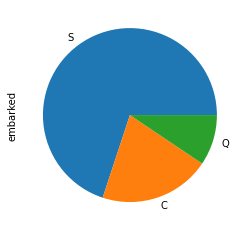

In [9]:
df['embarked'].value_counts().plot(kind='pie')

<AxesSubplot:>

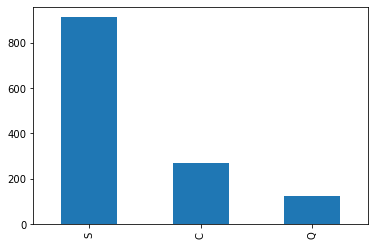

In [10]:
df['embarked'].value_counts().plot(kind='bar')

<AxesSubplot:>

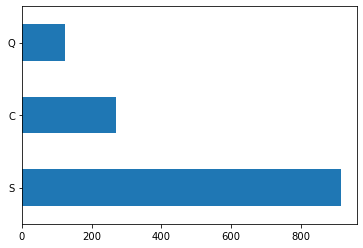

In [11]:
df['embarked'].value_counts().plot(kind='barh')

In [12]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [13]:
(500/1309)*100

38.19709702062643

In [14]:
social = df.groupby('pclass').mean()

In [15]:
print(social)

        survived        age     sibsp     parch       fare        body
pclass                                                                
1       0.619195  39.159918  0.436533  0.365325  87.508992  162.828571
2       0.429603  29.506705  0.393502  0.368231  21.179196  167.387097
3       0.255289  24.816367  0.568406  0.400564  13.302889  155.818182


<AxesSubplot:xlabel='pclass'>

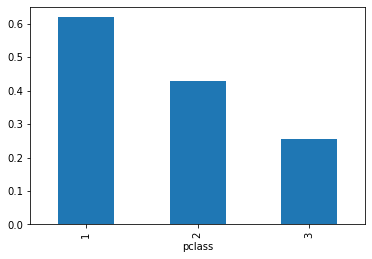

In [16]:
social['survived'].plot.bar()

In [17]:
genderbased = df.groupby('sex').mean()

<AxesSubplot:xlabel='sex'>

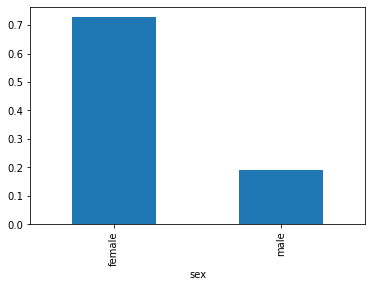

In [18]:
genderbased['survived'].plot.bar()

In [19]:
genderbased

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [43]:
agebased = df.groupby('age').mean()

In [21]:
agebased

,pclass,survived,sibsp,parch,fare,body
age,,,,,,
0.1667,3.0,1.000000,1.000000,2.0,20.575000,NaN
0.3333,3.0,0.000000,0.000000,2.0,14.400000,NaN
0.4167,3.0,1.000000,0.000000,1.0,8.516700,NaN
0.6667,2.0,1.000000,1.000000,1.0,14.500000,NaN
0.7500,3.0,0.666667,1.666667,1.0,17.430533,NaN
...,...,...,...,...,...,...
70.5000,3.0,0.000000,0.000000,0.0,7.750000,171.0
71.0000,1.0,0.000000,0.000000,0.0,42.079200,22.0
74.0000,3.0,0.000000,0.000000,0.0,7.775000,NaN


In [22]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age = df.groupby([(pd.cut(df.age, ranges)), 'sex']).mean()

In [23]:
age

pclass  survived        age     sibsp     parch       fare  \
age      sex                                                                    
(0, 10]  female  2.682927  0.609756   4.355693  1.463415  1.439024  26.932924   
         male    2.622222  0.555556   4.257407  1.933333  1.377778  31.716664   
(10, 20] female  2.323529  0.735294  17.044118  0.602941  0.455882  33.923963   
         male    2.670213  0.148936  17.457447  0.617021  0.351064  25.105453   
(20, 30] female  2.158730  0.722222  25.333333  0.476190  0.492063  42.511079   
         male    2.485106  0.182979  25.319149  0.246809  0.072340  20.463863   
(30, 40] female  1.826667  0.813333  35.306667  0.493333  0.626667  64.832721   
         male    2.266667  0.207407  35.018519  0.288889  0.296296  30.406387   
(40, 50] female  1.739130  0.782609  45.782609  0.456522  0.913043  66.778717   
         male    1.813953  0.186047  45.145349  0.337209  0.139535  36.810901   
(50, 60] female  1.160000  0.920000  55.680000  0.640000  0.520000  89.606832   
         male    1.540541  0.189189  54.851351  0.270270  0.270270  43.251803   
(60, 70] female  1.333333  0.833333  63.166667  0.500000  0.500000  83.172217   
         male    1.571429  0.047619  63.642857  0.285714  0.428571  61.018960   
(70, 80] female  1.000000  1.000000  76.000000  1.000000  0.000000  78.850000   
         male    1.800000  0.200000  73.300000  0.000000  0.000000  25.936680   

                       body  
age      sex                 
(0, 10]  female         NaN  
         male      4.000000  
(10, 20] female  226.666667  
         male    139.100000  
(20, 30] female  206.000000  
         male    169.281250  
(30, 40] female  194.000000  
         male    152.766667  
(40, 50] female    7.000000  
         male    158.809524  
(50, 60] female   52.000000  
         male    173.250000  
(60, 70] female         NaN  
         male    207.875000  
(70, 80] female         NaN  
         male     96.500000

## Data Preparation

In [24]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [25]:
df = df.drop(['cabin', 'boat', 'body'], axis = 1)

In [26]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

In [27]:
mean_age = df.age.mean()
df['age'] = df['age'].fillna(mean_age)

In [28]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
embarked       2
home.dest    564
dtype: int64

In [29]:
emb_mode = df.embarked.mode()

In [30]:
emb_mode

0    S
dtype: object

In [31]:
df['embarked'] = df['embarked'].fillna(emb_mode).iloc[0]

In [32]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           1
embarked       0
home.dest    564
dtype: int64

In [33]:
df.embarked

0       S
1       S
2       S
3       S
4       S
       ..
1304    S
1305    S
1306    S
1307    S
1308    S
Name: embarked, Length: 1309, dtype: object

In [34]:
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['sex'] = le.fit_transform(df['sex'])
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name', 'ticket', 'home.dest'], axis=1)
    return processed_df

In [35]:
dff = preprocessor(df)

In [36]:
dff.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,0
1,1,1,1,0.9167,1,2,151.5500,0
2,1,0,0,2.0000,1,2,151.5500,0
3,1,0,1,30.0000,1,2,151.5500,0
4,1,0,0,25.0000,1,2,151.5500,0


# Pandas Profiling

In [37]:
import pandas_profiling

In [40]:
pandas_profiling.ProfileReport(df).to_file('./pandas-reports/titanic-report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
import seaborn as sns

In [42]:
sns.boxplot(x='grouping', y='height', data=df)

ValueError: Could not interpret input 'grouping'